# Analyzing My Viewing Activity on Netflix

There is an opportunity on a Netflix account to get the file that reflects all your viewing activity there. I ordered such a file and Netflix sent it to me the next day.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
file = pd.read_csv("NetflixViewingActivity.csv")

The file looks like this:

In [2]:
file.head(10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Olga,1/2/2021 4:21,0:18:01,NaN,Cobra Kai: Season 2: Back In Black (Episode 2),NaN,Chrome PC (Cadmium),0:19:02,0:19:02,US (United States)
1,Olga,1/2/2021 4:20,0:00:43,Autoplayed: user action: None;,Season 3 Trailer: Cobra Kai,TRAILER,Chrome PC (Cadmium),0:00:43,0:00:43,US (United States)
2,Olga,12/31/2020 0:29,0:00:11,Autoplayed: user action: None;,The Help_hook_primary_16x9,HOOK,Chrome PC (Cadmium),0:00:11,0:00:11,US (United States)
3,Olga,12/31/2020 0:29,0:00:05,Autoplayed: user action: None;,Trailer: Death to 2020,TRAILER,Chrome PC (Cadmium),0:00:05,0:00:05,US (United States)
4,Olga,12/26/2020 23:08,0:00:07,Autoplayed: user action: None;,How the Grinch Stole Christmas_hook_primary_16x9,HOOK,Chrome PC (Cadmium),0:00:07,0:00:07,US (United States)
5,Olga,12/26/2020 22:57,0:06:52,NaN,Dinner for Schmucks,NaN,Chrome PC (Cadmium),1:32:35,1:32:35,US (United States)
6,Olga,12/26/2020 22:56,0:00:25,Autoplayed: user action: None;,Dinner for Schmucks_hook_primary_16x9,HOOK,Chrome PC (Cadmium),0:00:25,0:00:25,US (United States)
7,Olga,12/26/2020 22:56,0:00:06,Autoplayed: user action: None;,Not Another Teen Movie_hook_primary_16x9,HOOK,Chrome PC (Cadmium),0:00:06,0:00:06,US (United States)
8,Olga,12/26/2020 22:56,0:00:13,Autoplayed: user action: None;,Mr. Deeds_hook_primary_16x9,HOOK,Chrome PC (Cadmium),0:00:13,0:00:13,US (United States)
9,Olga,12/26/2020 22:55,0:00:32,Autoplayed: user action: None;,Jim & Andy: The Great Beyond - Featuring a Ver...,TRAILER,Chrome PC (Cadmium),0:00:33,0:00:33,US (United States)


In [3]:
file.shape

(3733, 10)

There are 3733 rows and 10 columns in the file. It reflects that I came to the USA in 2018 
and got my own Netflix subscription in October 2018. I am their customer since then.

From the end of April to the 17th of September 2019, I was back in Russia. 


In [4]:
file['Country'].value_counts()

US (United States)         2633
RU (Russian Federation)    1100
Name: Country, dtype: int64

It means that although  the ratio of time I was in Russia to be in the US is 5 : 22 ( 22,7 % of all the time) 
29,4 % of all entries to the file were made when I was in Russia.

It makes sense so as I was on vacation and watched Netflix more than usual.


Let us keep this column ['Country'], but make it shorter:


In [5]:
file['Country'] = file['Country'].str.replace('(United States)','').str.replace('(Russian Federation)','')
file['Country'] = file['Country'].str.replace(')','').str.replace('(','')
    

Now there are only 'US' and 'RU' - short abbreviations there.

In [6]:
file['Country'].value_counts()

US     2633
RU     1100
Name: Country, dtype: int64

Some of the columns are not informative for us at all. 

In [7]:
file['Attributes'].value_counts()

Autoplayed: user action: None;                 1160
Autoplayed: user action: Unspecified;           247
Autoplayed: user action: User_Interaction;       46
Name: Attributes, dtype: int64

We will erase these columns:

In [8]:
file = file.drop(columns=['Profile Name', 'Device Type', 'Attributes'])

Now the file looks better. Only 7 columns left:

In [9]:
file.head()

,Start Time,Duration,Title,Supplemental Video Type,Bookmark,Latest Bookmark,Country
0,1/2/2021 4:21,0:18:01,Cobra Kai: Season 2: Back In Black (Episode 2),NaN,0:19:02,0:19:02,US
1,1/2/2021 4:20,0:00:43,Season 3 Trailer: Cobra Kai,TRAILER,0:00:43,0:00:43,US
2,12/31/2020 0:29,0:00:11,The Help_hook_primary_16x9,HOOK,0:00:11,0:00:11,US
3,12/31/2020 0:29,0:00:05,Trailer: Death to 2020,TRAILER,0:00:05,0:00:05,US
4,12/26/2020 23:08,0:00:07,How the Grinch Stole Christmas_hook_primary_16x9,HOOK,0:00:07,0:00:07,US


However, several names of columns are too long and consist of several words. 
It is not so convenient to make analytics. Let us rename them. 

In [10]:
file.dtypes

Start Time                 object
Duration                   object
Title                      object
Supplemental Video Type    object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [11]:
file.rename(columns = {'Start Time': 'Start_Time', 'Latest Bookmark': 'Latest_Bookmark', 'Supplemental Video Type': 'Video_Type'},inplace = True)

We transfer corresponding columns into DateTime and TimeDelta types:

In [12]:
file['Start_Time']= pd.to_datetime(file.Start_Time)

In [13]:
file['Duration']= pd.to_timedelta(file.Duration)

In [14]:
file.dtypes

Start_Time          datetime64[ns]
Duration           timedelta64[ns]
Title                       object
Video_Type                  object
Bookmark                    object
Latest_Bookmark             object
Country                     object
dtype: object

Everything looks fine now, and we can make operations with Duration column entries now:

In [15]:
file['Duration'][0]+file['Duration'][1]

Timedelta('0 days 00:18:44')

The total time which I have spent watching Netflix looks formidable:

In [16]:
file['Duration'].sum()

Timedelta('46 days 23:41:13')

Taking into account that 8 hours a day usually is for sleep, 
let us calculate how much ACTIVE daytime I spent watching movies. 
We will increase the total time in 1/3, so as 8 hours are 1/3 out of 24:

In [17]:
file['Duration'].sum()*4/3

Timedelta('62 days 15:34:57.333333')

Let us look at Video_Type column. 
If the row in the file is about film or serial, the Video_Type column is empty (Nan). If there is an entry at Video_Type column, it means 
it was a preview, trailer, etc., something from an advertisement.


In [18]:
file.groupby('Video_Type').Duration.sum()

Video_Type
BIG_ROW          00:00:35
BUMPER           00:00:10
HOOK             01:58:39
PREVIEW          00:09:35
PROMOTIONAL      00:01:54
RECAP            00:12:23
TEASER_TRAILER   00:03:17
TRAILER          04:14:40
Name: Duration, dtype: timedelta64[ns]

It is approximately 6 hours were spent watching advertisement for movies.  

In [19]:
file['Video_Type'].value_counts()

TRAILER           532
HOOK              373
PREVIEW            44
TEASER_TRAILER      8
PROMOTIONAL         6
RECAP               5
BIG_ROW             3
BUMPER              1
Name: Video_Type, dtype: int64

Let is erase all pertinent to an advertisement. The entries into 'Video_Type' should be 

In [20]:
commerce = ['TRAILER', 'HOOK', 'PREVIEW', 'TEASER_TRAILER', 'PROMOTIONAL', 'RECAP BUMPER']

and leave the information about films and serials only.  The table without info on promo let us name 
file_clean. 

In [21]:
file_clean = file[file['Video_Type'].isnull()].copy()

There are only 2761 entries left. 

In [22]:
file_clean.shape

(2761, 7)

Let us reset old indices and create the new ones for this cleaned file.

In [23]:
file_clean = file_clean.reset_index()

In [24]:
file_clean

,index,Start_Time,Duration,Title,Video_Type,Bookmark,Latest_Bookmark,Country
0,0,2021-01-02 04:21:00,00:18:01,Cobra Kai: Season 2: Back In Black (Episode 2),NaN,0:19:02,0:19:02,US
1,5,2020-12-26 22:57:00,00:06:52,Dinner for Schmucks,NaN,1:32:35,1:32:35,US
2,11,2020-12-26 22:54:00,00:00:07,Yes Man,NaN,0:00:07,0:00:07,US
3,15,2020-12-25 05:26:00,00:22:04,Trollhunters: Tales of Arcadia: Part 1: Becomi...,NaN,0:22:04,0:22:04,US
4,18,2020-12-25 05:07:00,00:00:05,The Midnight Sky,NaN,0:00:05,0:00:05,US
...,...,...,...,...,...,...,...,...
2756,3728,2018-10-02 04:57:00,00:31:36,Atypical: Season 1: A Nice Neutral Smell (Epis...,NaN,0:31:40,0:31:40,US
2757,3729,2018-10-02 04:27:00,00:30:18,Atypical: Season 1: Julia Says (Episode 3),NaN,0:30:22,0:30:22,US
2758,3730,2018-10-02 03:12:00,00:00:01,Atypical: Season 1: Julia Says (Episode 3),NaN,0:00:05,Not latest view,US
2759,3731,2018-10-02 02:39:00,00:32:38,Atypical: Season 1: A Human Female (Episode 2),NaN,0:32:42,0:32:42,US


Let us clean Title column. 

In [25]:
films = file_clean.groupby('Title').Duration.sum()

In [26]:
print(films)

Title
13 Commandments: Season 1: Episode 1                                        00:00:44
13 Reasons Why: Season 1: Tape 1, Side A (Episode 1)                        00:00:34
13 Reasons Why: Season 1: Tape 1, Side B (Episode 2)                        00:09:52
3 Idiots                                                                    00:03:08
A California Christmas                                                      01:23:21
                                                                              ...   
You: Season 1: The Last Nice Guy in New York (Episode 2)                    00:43:28
You: Season 1: You Got Me, Babe (Episode 8)                                 00:44:36
Young Adult                                                                 00:03:07
Zack and Miri Make a Porno                                                  01:30:50
the goop lab with Gwyneth Paltrow: Season 1: The Healing Trip (Episode 1)   00:06:32
Name: Duration, Length: 1938, dtype: timedelta64[ns]


You can see that the name of the movie itself is at the beginning of the entry. 
Then, after the colon sign, the number of seasons or episodes comes.
Let is left the names of the films only and get rid of everything written after the first ':' sign. 
Let write a function for this purpose:

In [27]:
def clean_title(movie_name):
        new_name = ''
        for let in movie_name:
            if let != ':':
                new_name +=let
            else: 
                return new_name.strip()
        return new_name.strip()
            

Let us clean Title column using the new function:

In [28]:
file_clean['Title'] = file_clean['Title'].apply(clean_title)

In [29]:
file_clean['Title']

0                 Cobra Kai
1       Dinner for Schmucks
2                   Yes Man
3              Trollhunters
4          The Midnight Sky
               ...         
2756               Atypical
2757               Atypical
2758               Atypical
2759               Atypical
2760               Atypical
Name: Title, Length: 2761, dtype: object

Now we can find out how much time in total was spent watching every single serial:

In [30]:
file_clean.groupby('Title').Duration.sum().sort_values(ascending = False).head(20)

Title
Mad Men                       3 days 00:29:55
Suits                         2 days 15:22:13
How to Get Away With Murder   2 days 06:43:44
Doc Martin                    1 days 22:15:34
Weeds                         1 days 21:40:35
Better Call Saul              1 days 10:14:24
The Tudors                    1 days 08:26:44
Crazy Ex-Girlfriend           1 days 07:17:38
Money Heist                   1 days 05:02:26
Babylon Berlin                0 days 20:49:55
Broadchurch                   0 days 18:38:29
The Good Place                0 days 18:17:25
Last Tango in Halifax         0 days 17:53:50
Outlander                     0 days 17:13:35
Good Girls                    0 days 15:45:12
Insatiable                    0 days 15:07:22
Sex Education                 0 days 13:19:04
Ken Burns                     0 days 13:08:00
Californication               0 days 12:05:20
Cheers                        0 days 11:07:06
Name: Duration, dtype: timedelta64[ns]

Yes, my favorite serials which I used to binge-watch are at the top of the list.

# How Long I Watched Netflix Each Month 

To estimate how long I watched Netflix each month, let us create a new column with info on month and year only.

In [31]:
file['Monthly_Basis'] = pd.to_datetime(file['Start_Time']).dt.to_period('M')
file.head()

,Start_Time,Duration,Title,Video_Type,Bookmark,Latest_Bookmark,Country,Monthly_Basis
0,2021-01-02 04:21:00,00:18:01,Cobra Kai: Season 2: Back In Black (Episode 2),NaN,0:19:02,0:19:02,US,2021-01
1,2021-01-02 04:20:00,00:00:43,Season 3 Trailer: Cobra Kai,TRAILER,0:00:43,0:00:43,US,2021-01
2,2020-12-31 00:29:00,00:00:11,The Help_hook_primary_16x9,HOOK,0:00:11,0:00:11,US,2020-12
3,2020-12-31 00:29:00,00:00:05,Trailer: Death to 2020,TRAILER,0:00:05,0:00:05,US,2020-12
4,2020-12-26 23:08:00,00:00:07,How the Grinch Stole Christmas_hook_primary_16x9,HOOK,0:00:07,0:00:07,US,2020-12


Now I can calculate how long I spent on Netflix each month:

In [32]:
file.groupby('Monthly_Basis').Duration.sum()

Monthly_Basis
2018-10   1 days 11:34:47
2018-11   1 days 20:37:52
2018-12   1 days 16:40:00
2019-01   2 days 10:02:35
2019-02   1 days 00:23:19
2019-03   0 days 21:36:15
2019-04   2 days 09:47:05
2019-05   3 days 16:31:49
2019-06   4 days 04:57:26
2019-07   2 days 05:54:17
2019-08   2 days 08:32:03
2019-09   1 days 18:21:56
2019-10   1 days 08:01:08
2019-11   1 days 09:00:30
2019-12   2 days 08:27:52
2020-01   1 days 11:53:52
2020-02   1 days 14:51:45
2020-03   2 days 14:10:19
2020-04   1 days 00:59:52
2020-05   2 days 08:14:52
2020-06   1 days 13:03:17
2020-07   1 days 01:09:57
2020-08   1 days 03:03:52
2020-09   0 days 13:55:03
2020-10   0 days 14:05:07
2020-11   1 days 03:42:31
2020-12   0 days 17:43:08
2021-01   0 days 00:18:44
Freq: M, Name: Duration, dtype: timedelta64[ns]

To plot a graph, let us transfer the time span into hours.

In [33]:
monthes = list(file.groupby('Monthly_Basis').Duration.sum())
monthes_in_hours = []
for mon in monthes:
    hours = round(mon.total_seconds()/3600,0)
    print(hours)
    monthes_in_hours.append(hours)

36.0
45.0
41.0
58.0
24.0
22.0
58.0
89.0
101.0
54.0
57.0
42.0
32.0
33.0
56.0
36.0
39.0
62.0
25.0
56.0
37.0
25.0
27.0
14.0
14.0
28.0
18.0
0.0


In [34]:
monthes_in_hours[:-1]

[36.0,
 45.0,
 41.0,
 58.0,
 24.0,
 22.0,
 58.0,
 89.0,
 101.0,
 54.0,
 57.0,
 42.0,
 32.0,
 33.0,
 56.0,
 36.0,
 39.0,
 62.0,
 25.0,
 56.0,
 37.0,
 25.0,
 27.0,
 14.0,
 14.0,
 28.0,
 18.0]

In [35]:
num_cols = list(file['Monthly_Basis'].unique())
num_cols = sorted(num_cols)

The average number of hours of watching Netflix per month:

In [36]:
round(sum(monthes_in_hours[:-1])/len(monthes_in_hours[:-1]),0)

42.0

It means that daily I watch TV for about 1.4 hours or 1 hour 24 min

In [37]:
round(sum(monthes_in_hours[:-1])/len(monthes_in_hours[:-1])/30.5,1)
2/5*60

24.0

Finally, let us draw a graph: 

file 

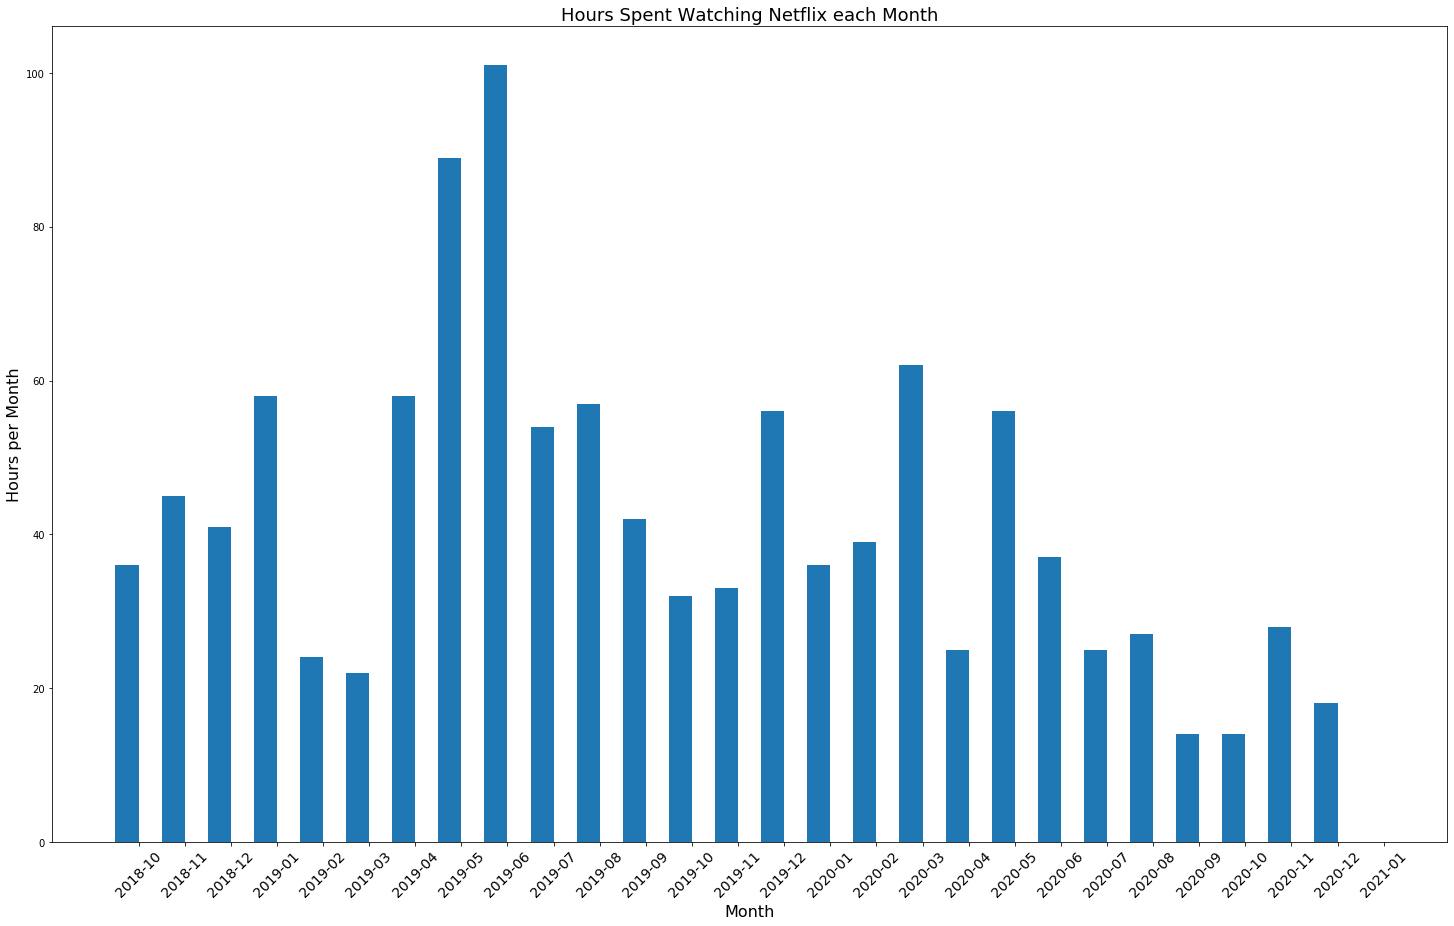

In [38]:
from numpy import arange
num_cols = list(file['Monthly_Basis'].unique())
num_cols = sorted(num_cols)
bar_heights = monthes_in_hours
num = len(monthes_in_hours)
bar_positions = arange(num) + 0.75
tick_positions = range(1,num+1)
fig, ax = plt.subplots(figsize=(25,15))
ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=45, size=14)

ax.set_xlabel('Month', size=16)
ax.set_ylabel('Hours per Month', size=16)
ax.set_title('Hours Spent Watching Netflix each Month', size=18)
plt.show()
       


# Conclusions:

Looking into the Netflix data reveals that I used to watch Netflix too much. 
    
During 2 years and 3 months, I spent 2 months of active time watching Netflix. So, on average it is 1h and 20 min a day.  When I am on vacation, I used to spend more time watching movies as usual. 

My favorite serials turn to be the most time-consuming for me. 

In my defense, I would say that I was a newcomer to the United States and watching films helped me for improving my accent. Moreover, watching old movies helps to be acquainted with American culture in general, so I cannot consider this time wasted in vain. However, I should definitely reduce the time for Netflix and in the future do more coding for leisure activity instead. 
